# Dataset analysis 

In [58]:
import numpy as np
import math
import pandas as pd
import os.path
import matplotlib.pyplot as plt
from typing import List, Dict
import seaborn as sns
import json
from matplotlib import cm
from pprint import pformat
import json
import tikzplotlib


plt.style.use("seaborn")
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [59]:
colormap = cm.get_cmap('gist_stern_r')
colors = [colormap(int(4.3*51))]+[colormap(x*51) for x in range(1,6)]
print(colors)

[(0.569167404596247, 0.14117647058823535, 0.2823529411764706, 1.0), (0.8, 0.8, 0.24528301886792458, 1.0), (0.6, 0.6, 0.5744680851063829, 1.0), (0.3999999999999999, 0.4, 0.8, 1.0), (0.27610394265232974, 0.19999999999999996, 0.4, 1.0), (0.0, 0.0, 0.0, 1.0)]


In [60]:
def load_json(filename : str) -> Dict:
    with open(filename, 'r') as f:
        data = json.load(f)
    return data

# Point annotated results

In [61]:
base_path_raw = r'/media/jan/DataStorage/ProjectData/temp/results_weighted_dataset_X_contrast_3'
base_path = [os.path.abspath(base_path_raw.replace('X', str(i))) for i in range(3)]

In [62]:
def get_results_frame(dim : int, csv_name = 'parameter_overview') -> pd.DataFrame:
    model_folders = [os.path.join(base_path[dim], o) for o in os.listdir(base_path[dim]) if os.path.isdir(os.path.join(base_path[dim],o)) and not o.startswith('.')]
    results = list()
    for folder in model_folders:
        try:
            r = load_json(os.path.join(folder, r'score_dict_final.json'))
        except:
            print(f'No experimant dict for folder {folder}.')
            continue
        exp_dict = load_json(os.path.join(folder, f'exp_dict.json'))
        r.update({
            'model_base' : exp_dict['model']['base'],
            'context_span' : exp_dict['dataset']['context_span'],
            'blob_points' : exp_dict['dataset']['blob_points'],
            'bg_points' : exp_dict['dataset']['bg_points'],
            'loss' : exp_dict['model']['loss'],
            'foldername' : folder.split('/')[-1],
            'sources' : exp_dict['dataset']['sources'],
            'separation_loss' : ('separation_loss' in exp_dict['model']['loss']),
            'prior_extend' : ('prior_extend' in exp_dict['model']['loss']),
            'weighted_point_loss' : ('rot_point_loss_multi_weighted' in exp_dict['model']['loss'])
        })
        results.append(r)

    results = pd.DataFrame(results).sort_values(['test_weighted_dice', 'test_dice'], ascending = False).reset_index(drop=True)
    results.to_csv(f'{csv_name}_dim{dim}')
    return results

In [63]:
results_dict = {dim : get_results_frame(dim) for dim in range(3)}
results_dict[0][['context_span', 'blob_points', 'bg_points', 'loss', 'separation_loss', 'weighted_point_loss', 'prior_extend', 'sources', 'test_weighted_dice', 'foldername']]

No experimant dict for folder /media/jan/DataStorage/ProjectData/temp/results_weighted_dataset_1_contrast_3/f877f00e3685efddf33a64d51d311dcb.
No experimant dict for folder /media/jan/DataStorage/ProjectData/temp/results_weighted_dataset_2_contrast_3/a38029e4d3d6d3c46092aa963ef04570.


,context_span,blob_points,bg_points,loss,separation_loss,weighted_point_loss,prior_extend,sources,test_weighted_dice,foldername
0,1,1,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.625821,e5df8bf39051f574de84779e9b30c029_xVertSeg
1,1,1,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.565390,e5df8bf39051f574de84779e9b30c029_PLoS
2,1,1,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.559706,e5df8bf39051f574de84779e9b30c029_USiegen
3,1,3,10,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.495984,28226d50e9b646704dd7b51c35de21d3
4,1,1,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.475737,e5df8bf39051f574de84779e9b30c029
5,1,5,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.470770,6126782960c8ebeb44c781ecade37ba1
6,1,3,10,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,True,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.442121,77f85a6af05d76de63618ecb027b4210
7,1,1,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.427556,e5df8bf39051f574de84779e9b30c029_MyoSegmenTUM
8,1,5,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",False,False,True,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.359360,b498b1c4bb2a67d50083b0e0fafab75d
9,1,5,5,"[unsupervised_rotation_loss, rot_point_loss_mu...",True,False,False,"[xVertSeg, USiegen, MyoSegmenTUM, PLoS]",0.317056,cbce367c887651d9c7baa1cf17defa60


investigate influence of leaving out a loss term

    train_score  train_weighted_dice  train_dice  train_loss  epoch  waiting  \
3      0.389227             0.389227    0.481686   -8.409649      2        4   
11     0.133221             0.133221    0.096714   -7.534370     13        4   

    val_score  val_weighted_dice  val_dice  test_dice  ...  model_base  \
3    0.360313           0.360313  0.458403   0.444835  ...  fcn8_vgg16   
11   0.115314           0.115314  0.083985   0.084613  ...  fcn8_vgg16   

    context_span  blob_points  bg_points  \
3              1            5          5   
11             1            5          5   

                                                 loss  \
3   [unsupervised_rotation_loss, rot_point_loss_mu...   
11  [unsupervised_rotation_loss, rot_point_loss_mu...   

                          foldername                            sources  \
3   7b8b7a23f8c8708146931117bac6ffda  [xVertSeg, USiegen, MyoSegmenTUM]   
11  84dac37fa575a29e150a8a3aa16f3a90  [xVertSeg, USiegen, MyoSegmenTUM]   

    s

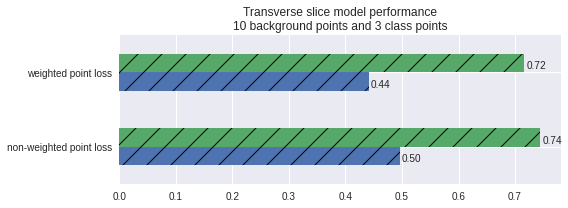

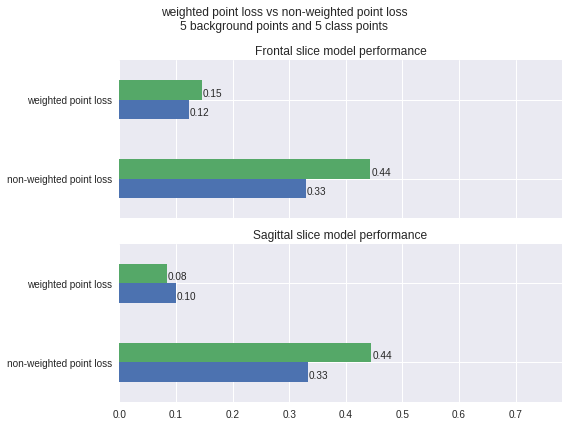

In [64]:
plt.figure(figsize=(8,3))
ax = plt.subplot(1,1,1)
res_select = results_dict[0].query('context_span == 1 & blob_points == 3 & bg_points == 10')
bars = res_select.plot.barh(x = 'weighted_point_loss', y = ['test_weighted_dice', 'test_dice'], 
                            ax=plt.gca(), hatch = '/', alpha=.99, legend=False)
for p in bars.patches:
    ax.annotate(f'{p.get_width():0.2f}', ( p.get_width() * 1.005, p.get_y() + 0.05))
plt.title('Transverse slice model performance\n10 background points and 3 class points')
plt.yticks(ticks = [True, False], labels = ['weighted point loss', 'non-weighted point loss'])
plt.ylabel('')
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.35),ncol=2)
plt.tight_layout()
plt.savefig('weightedvsnonweighted_transverse.pdf')

plt.figure(figsize=(8,6))
plt.subplot(2,1,1, sharex = ax)
res_select = results_dict[1].query('context_span == 1 & blob_points == 5 & bg_points == 5')
bars = res_select.plot.barh(x = 'weighted_point_loss', y = ['test_weighted_dice', 'test_dice'], ax=plt.gca(), legend=False)
for p in bars.patches:
    plt.annotate(f'{p.get_width():0.2f}', ( p.get_width() * 1.005, p.get_y() + 0.05))
plt.title('Frontal slice model performance')
plt.yticks(ticks = [True, False], labels = ['weighted point loss', 'non-weighted point loss'])
plt.ylabel('')

plt.subplot(2,1,2, sharex = ax)
res_select = results_dict[2].query('context_span == 1 & blob_points == 5 & bg_points == 5 & separation_loss')
print(res_select)
bars = res_select.plot.barh(x = 'weighted_point_loss', y = ['test_weighted_dice', 'test_dice'], ax=plt.gca(), legend=False)
for p in bars.patches:
    plt.annotate(f'{p.get_width():0.2f}', ( p.get_width() * 1.005, p.get_y() + 0.05))
plt.title('Sagittal slice model performance')
plt.yticks(ticks = [True, False], labels = ['weighted point loss', 'non-weighted point loss'])
plt.ylabel('')
#plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25),ncol=2)

plt.suptitle('weighted point loss vs non-weighted point loss\n5 background points and 5 class points')
plt.tight_layout()

plt.savefig('weightedvsnonweighted.pdf',bbox_inches='tight')

7b8b7a23f8c8708146931117bac6ffda
84dac37fa575a29e150a8a3aa16f3a90
            MyoSegmentum   USiegen  xVertSeg     total
Background      0.000000  0.000000  0.000000  0.000000
L1              0.078320  0.089939  0.046883  0.072821
L2              0.050541  0.046197  0.012876  0.042459
L3              0.137998  0.176476  0.096341  0.136871
L4              0.045290  0.037911  0.008091  0.028670
L5              0.002959  0.003767  0.001025  0.002036


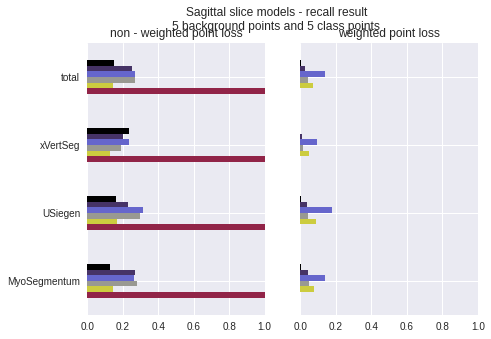

In [65]:
plt.figure(figsize=(7,5))
ax = plt.subplot(1,2,1)

foldername = '7b8b7a23f8c8708146931117bac6ffda'
print(foldername)
Myo_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_MyoSegmenTUM_df.csv'), index_col=0)
USieg_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_USiegen_df.csv'), index_col=0)
xVert_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_xVertSeg_df.csv'), index_col=0)
all_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_df.csv'), index_col=0)

temp = pd.DataFrame()
for name, df in zip(['MyoSegmentum', 'USiegen', 'xVertSeg', 'total'], [Myo_df, USieg_df, xVert_df, all_df]):
    temp[name] = df['recall']

temp.T.plot(kind = 'barh', xlim = (0, 1), ax=plt.gca(), legend = False, 
            color = colors)
plt.title('non - weighted point loss')

plt.subplot(1,2,2, sharey = ax)

foldername = '84dac37fa575a29e150a8a3aa16f3a90'
print(foldername)
Myo_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_MyoSegmenTUM_df.csv'), index_col=0)
USieg_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_USiegen_df.csv'), index_col=0)
xVert_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_xVertSeg_df.csv'), index_col=0)
all_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_df.csv'), index_col=0)

temp = pd.DataFrame()
for name, df in zip(['MyoSegmentum', 'USiegen', 'xVertSeg', 'total'], [Myo_df, USieg_df, xVert_df, all_df]):
    temp[name] = df['recall']

temp.T.plot(kind = 'barh', xlim = (0, 1), ax=plt.gca(), 
            color = colors, legend=False)
plt.title('weighted point loss')
# plt.legend(loc='lower center', bbox_to_anchor=(0, -0.15),ncol=6)

plt.suptitle('Sagittal slice models - recall result\n5 background points and 5 class points')

plt.savefig('perClass_weighted_nonweighted.pdf',bbox_inches='tight')

print(temp)

84dac37fa575a29e150a8a3aa16f3a90


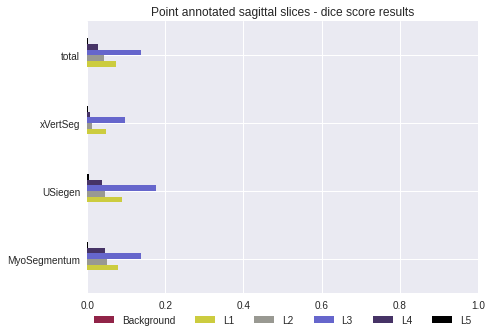

In [66]:
foldername = '84dac37fa575a29e150a8a3aa16f3a90'
print(foldername)
Myo_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_MyoSegmenTUM_df.csv'), index_col=0)
USieg_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_USiegen_df.csv'), index_col=0)
xVert_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_xVertSeg_df.csv'), index_col=0)
all_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_df.csv'), index_col=0)

temp = pd.DataFrame()
for name, df in zip(['MyoSegmentum', 'USiegen', 'xVertSeg', 'total'], [Myo_df, USieg_df, xVert_df, all_df]):
    temp[name] = df['recall']

temp.T.plot(kind = 'barh', xlim = (0, 1), figsize=(7,5), color=colors, legend=False)
plt.title('Point annotated sagittal slices - dice score results')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15),ncol=6)
plt.savefig('full_perClass_perSource_point_dice.pdf',bbox_inches='tight')

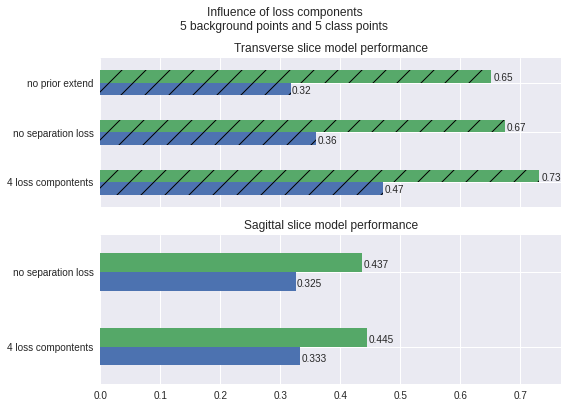

In [67]:
plt.figure(figsize=(8,8))
ax = plt.subplot(3,1,1)
res_select = results_dict[0].query('context_span == 1 & blob_points == 5 & bg_points == 5')
bars = res_select.plot.barh(x = 'loss', y = ['test_weighted_dice', 'test_dice'], 
                            ax=plt.gca(), legend=False, hatch = '/', alpha=.99)
for p in bars.patches:
    ax.annotate(f'{p.get_width():0.2f}', ( p.get_width() * 1.005, p.get_y() + 0.03))
plt.title('Transverse slice model performance')
plt.yticks(ticks = [2, 1, 0], labels = ['no prior extend', 'no separation loss', '4 loss compontents'])
plt.ylabel('')

plt.subplot(3,1,2, sharex = ax)
res_select = results_dict[2].query('context_span == 1 & blob_points == 5 & bg_points == 5 & not weighted_point_loss')
bars = res_select.plot.barh(x = 'loss', y = ['test_weighted_dice', 'test_dice'], ax=plt.gca(), legend=False)
for p in bars.patches:
    plt.annotate(f'{p.get_width():0.3f}', ( p.get_width() * 1.005, p.get_y() + 0.05))
plt.title('Sagittal slice model performance')
plt.yticks(ticks = [1, 0], labels = ['no separation loss', '4 loss compontents'])
plt.ylabel('')

#plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.50),ncol=2)

plt.suptitle('Influence of loss components\n5 background points and 5 class points')
plt.tight_layout()

plt.savefig('Losscomponents.pdf',bbox_inches='tight')

In [68]:
res_select = results_dict[1].query('context_span == 1 & weighted_point_loss == False & separation_loss')
res_select = res_select[-res_select.foldername.str.contains('_')]
res_1 = res_select.pivot(index = 'blob_points', columns = 'bg_points', values = 'test_weighted_dice')
res_select = results_dict[2].query('context_span == 1 & weighted_point_loss == False & separation_loss')

res_select = res_select[-res_select.foldername.str.contains('_')]

res_2 = res_select.pivot(index = 'blob_points', columns = 'bg_points', values = 'test_weighted_dice')

res_select[['foldername', 'blob_points', 'bg_points']]

,foldername,blob_points,bg_points
2,6ef4aab564b17ec9748cd7e25f651d09,1,3
3,7b8b7a23f8c8708146931117bac6ffda,5,5
4,2c47333b1ea4c305ed0a3e23f12ee32f,7,3
7,ace0b040af2185b7a0f5597fb628fc22,5,3
8,e924058886c7bf857f858db911a74908,7,5


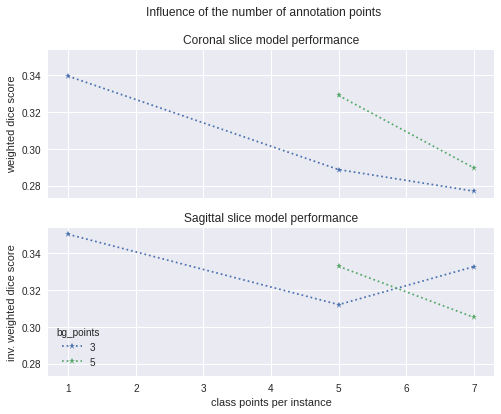

In [69]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
ax = res_1.plot(ax = plt.gca(), legend=False, linestyle = ':', marker = '*')
plt.xlabel('inv. weighted dice score')
plt.title('Coronal slice model performance')
ax.set_ylabel("weighted dice score")
plt.subplot(2,1,2, sharex = ax, sharey = ax)
ax = res_2.plot(ax = plt.gca(), linestyle = ':', marker = '*')
plt.title('Sagittal slice model performance')
ax.set_ylabel("inv. weighted dice score")
ax.set_xlabel("class points per instance")

plt.suptitle('Influence of the number of annotation points')

plt.savefig('BlobPoints_influence.pdf')

In [70]:
reconstruct_foldernames = []

res_select = results_dict[0].query('context_span == 1 & weighted_point_loss == False & separation_loss & blob_points == 1')
res_select = res_select[-res_select.foldername.str.contains('_')]
print(res_select[['foldername', 'val_weighted_dice']])
reconstruct_foldernames.append(res_select.foldername.iloc[0])
res_select = results_dict[1].query('context_span == 1 & weighted_point_loss == False & separation_loss & bg_points == 3 & blob_points == 1')
res_select = res_select[-res_select.foldername.str.contains('_')]
print(res_select[['foldername', 'val_weighted_dice']])
reconstruct_foldernames.append(res_select.foldername.iloc[0])
res_select = results_dict[2].query('context_span == 1 & weighted_point_loss == False & separation_loss & bg_points == 3 & blob_points == 1')
res_select = res_select[-res_select.foldername.str.contains('_')]
print(res_select[['foldername', 'val_weighted_dice']])
reconstruct_foldernames.append(res_select.foldername.iloc[0])


exp_dict_reconstruct = dict()
for i, foldername in enumerate(reconstruct_foldernames):
    folder = os.path.join(base_path[i], foldername)
    print(folder)
    exp_dict = load_json(os.path.join(folder, f'exp_dict.json'))
    exp_dict['hash'] = foldername
    exp_dict_reconstruct[i] = exp_dict

with open('exp_dict_reconstruct.json', 'w') as f:
    json.dump(exp_dict_reconstruct, f)
    

                         foldername  val_weighted_dice
4  e5df8bf39051f574de84779e9b30c029           0.460698
                         foldername  val_weighted_dice
2  6ef4aab564b17ec9748cd7e25f651d09           0.377457
                         foldername  val_weighted_dice
2  6ef4aab564b17ec9748cd7e25f651d09           0.377342
/media/jan/DataStorage/ProjectData/temp/results_weighted_dataset_0_contrast_3/e5df8bf39051f574de84779e9b30c029
/media/jan/DataStorage/ProjectData/temp/results_weighted_dataset_1_contrast_3/6ef4aab564b17ec9748cd7e25f651d09
/media/jan/DataStorage/ProjectData/temp/results_weighted_dataset_2_contrast_3/6ef4aab564b17ec9748cd7e25f651d09


# Validation morphological combination

   denoise  erode  weighted_dice_score  precision    recall
0        0      0               0.0005   0.166667  0.164586
1        0      1               0.0005   0.166667  0.164586
2        0      2               0.0005   0.166667  0.164586
3        0      3               0.0005   0.166667  0.164586
4        1      0               0.0005   0.166667  0.164586


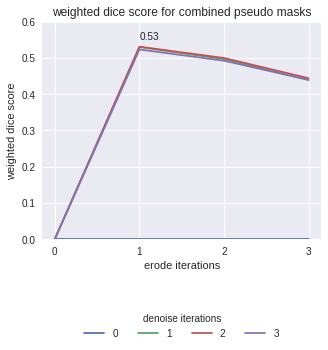

In [71]:
filename = '/media/jan/DataStorage/ProjectData/temp/reconstruct_1/validationSet_morphologicalIterations.csv'

optimization = pd.read_csv(filename)
print(optimization.head())
optimization = optimization.pivot(index=['erode'], columns=['denoise'], values='weighted_dice_score')
optimization.plot(figsize = (5,4))
plt.title('weighted dice score for combined pseudo masks')
plt.ylabel('weighted dice score')

plt.ylim(0,0.6)
plt.annotate(f'{optimization.max().max():0.2f}', ( 1, 0.55))
plt.xlabel('erode iterations')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5),ncol=6, title='denoise iterations')
#plt.tight_layout()
plt.xticks([0,1,2,3])
plt.savefig('combination_optimization_1.pdf', bbox_inches='tight')
plt.show()


/media/jan/DataStorage/ProjectData/temp/results_weighted_dataset_2_contrast_3/6ef4aab564b17ec9748cd7e25f651d09/test_metrics_MyoSegmenTUM_df.csv


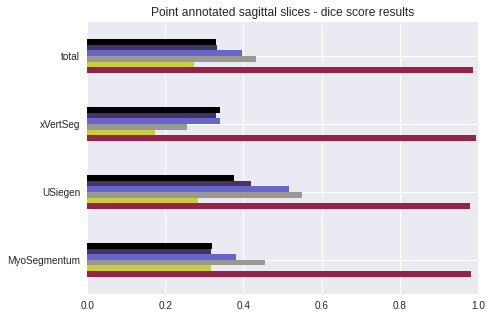

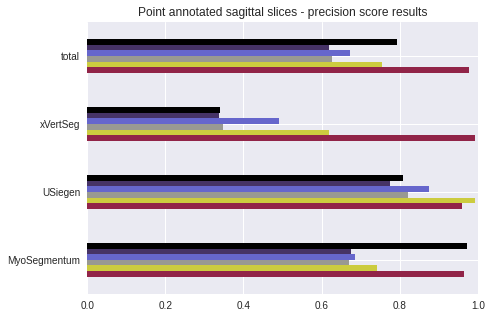

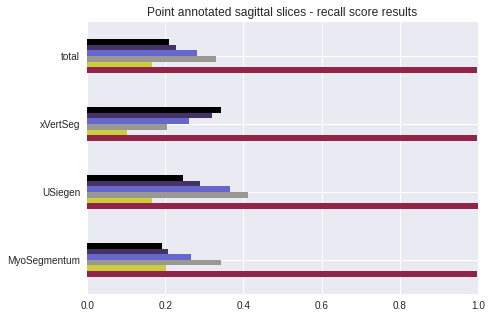

In [72]:
foldername = res_select.foldername.iloc[0]

print(os.path.join(base_path[2], foldername, 'test_metrics_MyoSegmenTUM_df.csv'))
Myo_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_MyoSegmenTUM_df.csv'), index_col=0)
USieg_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_USiegen_df.csv'), index_col=0)
xVert_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_xVertSeg_df.csv'), index_col=0)
all_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_df.csv'), index_col=0)

temp = pd.DataFrame()
for name, df in zip(['MyoSegmentum', 'USiegen', 'xVertSeg', 'total'], [Myo_df, USieg_df, xVert_df, all_df]):
    temp[name] = df['dice']

temp.T.plot(kind = 'barh', xlim = (0, 1), figsize=(7, 5), color=colors, legend=False)
plt.title('Point annotated sagittal slices - dice score results')
#plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15),ncol=6)
plt.savefig('pointAnnotated_perClass_perSource_point_dice.pdf',bbox_inches='tight')

temp = pd.DataFrame()
for name, df in zip(['MyoSegmentum', 'USiegen', 'xVertSeg', 'total'], [Myo_df, USieg_df, xVert_df, all_df]):
    temp[name] = df['precision']

temp.T.plot(kind = 'barh', xlim = (0, 1), figsize=(7,5), color=colors, legend=False)
plt.title('Point annotated sagittal slices - precision score results')
#plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15),ncol=6)
plt.savefig('pointAnnotated_perClass_perSource_point_precision.pdf',bbox_inches='tight')

temp = pd.DataFrame()
for name, df in zip(['MyoSegmentum', 'USiegen', 'xVertSeg', 'total'], [Myo_df, USieg_df, xVert_df, all_df]):
    temp[name] = df['recall']

temp.T.plot(kind = 'barh', xlim = (0, 1), figsize=(7,5), color=colors, legend=False)
plt.title('Point annotated sagittal slices - recall score results')
#plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15),ncol=6)
plt.savefig('pointAnnotated_perClass_perSource_point_recall.pdf',bbox_inches='tight')

In [73]:
res_select = results_dict[2].query('context_span == 1 & weighted_point_loss == False & separation_loss & bg_points == 3 & blob_points == 1')
res_select = res_select[res_select.foldername.str.contains('_')]
print(res_select[['foldername', 'test_weighted_dice']])

                                      foldername  test_weighted_dice
0       6ef4aab564b17ec9748cd7e25f651d09_USiegen            0.427247
1  6ef4aab564b17ec9748cd7e25f651d09_MyoSegmenTUM            0.353907
9      6ef4aab564b17ec9748cd7e25f651d09_xVertSeg            0.282290


# Fully supervised models

In [74]:
base_path_raw = r'/media/jan/DataStorage/ProjectData/temp/results_full_dataset_X_contrast_3'
base_path = [os.path.abspath(base_path_raw.replace('X', str(i))) for i in range(3)]
def get_results_frame(dim : int, csv_name = 'parameter_overview') -> pd.DataFrame:
    model_folders = [os.path.join(base_path[dim], o) for o in os.listdir(base_path[dim]) if os.path.isdir(os.path.join(base_path[dim],o)) and not o.startswith('.')]
    results = list()
    for folder in model_folders:
        try:
            r = load_json(os.path.join(folder, r'score_dict_final.json'))
        except:
            print(f'No experimant dict for folder {folder}.')
            continue
        exp_dict = load_json(os.path.join(folder, f'exp_dict.json'))
        r.update({
            'model_base' : exp_dict['model']['base'],
            'context_span' : exp_dict['dataset']['context_span'],
            'blob_points' : exp_dict['dataset']['blob_points'],
            'bg_points' : exp_dict['dataset']['bg_points'],
            'loss' : exp_dict['model']['loss'],
            'foldername' : folder.split('/')[-1],
            'sources' : exp_dict['dataset']['sources'],
            'separation_loss' : ('separation_loss' in exp_dict['model']['loss']),
            'prior_extend' : ('prior_extend' in exp_dict['model']['loss']),
            'weighted_point_loss' : ('rot_point_loss_multi_weighted' in exp_dict['model']['loss'])
        })
        results.append(r)

    results = pd.DataFrame(results).sort_values(['test_weighted_dice', 'test_dice'], ascending = False).reset_index(drop=True)
    results.to_csv(f'{csv_name}_dim{dim}')
    return results

results_dict = {dim : get_results_frame(dim) for dim in range(1,3)}
results_dict[2][['context_span', 'blob_points', 'bg_points', 'loss', 'separation_loss', 'weighted_point_loss', 'prior_extend', 'sources', 'test_weighted_dice', 'foldername']]

No experimant dict for folder /media/jan/DataStorage/ProjectData/temp/results_full_dataset_1_contrast_3/ab60e3fb01ac94277d5b75f445473d42.


,context_span,blob_points,bg_points,loss,separation_loss,weighted_point_loss,prior_extend,sources,test_weighted_dice,foldername
0,0,1,-1,cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.758672,edc036f241e350ed66b07d6edebaaef2
1,1,1,-1,cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.752692,dfaeaf1bd9747b2b0d135fd495f699ec
2,3,1,-1,cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.744971,b1292d31b739d2327982349d5f6b27e8
3,1,1,-1,weighted_cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.743244,365ae50c5f1f0a7320a2db9e99cd5cc8
4,3,1,-1,weighted_cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.739865,26aa087080bfa4fb5a6602d6fda8757d
5,1,1,-1,cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.719089,3ce60ea3c13d67ff7334beb1be210603
6,1,1,-1,cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.713119,6ab04a2154becb82b23e49700c9d2396
7,3,1,-1,cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.712101,4c21df3fe5f18164f1123cbd03edea2b
8,0,1,-1,weighted_cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.706862,16ad1271ac0f9f11c79a6d9e2b3cd8a4
9,0,1,-1,cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.702805,309402cd6123961fdd1a827faafdea05


In [75]:
res_select = results_dict[2][-results_dict[2].foldername.str.contains('_')]

loss         cross_entropy                   weighted_cross_entropy  \
model_base     fcn8_resnet fcn8_vgg16 unet2d            fcn8_resnet   
context_span                                                          
0                     0.67       0.76   0.70                   0.62   
1                     0.72       0.75   0.71                   0.66   
3                     0.71       0.74   0.65                   0.62   
0                     0.73       0.80   0.75                   0.68   
1                     0.77       0.80   0.76                   0.71   
3                     0.77       0.79   0.70                   0.69   

loss                            
model_base   fcn8_vgg16 unet2d  
context_span                    
0                  0.63   0.71  
1                  0.74   0.66  
3                  0.74   0.65  
0                  0.70   0.76  
1                  0.79   0.72  
3                  0.78   0.71

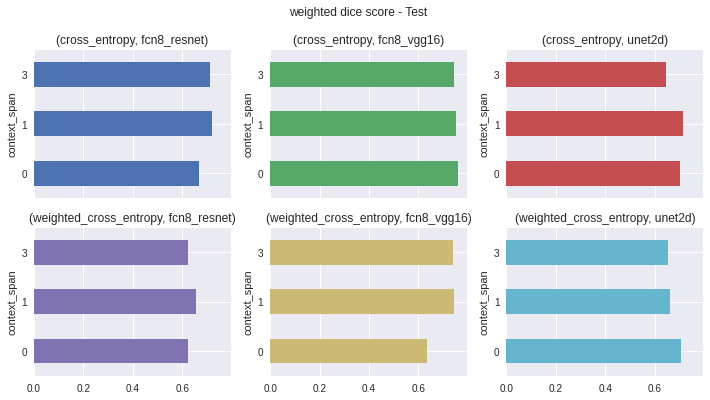

In [76]:
test_wd = res_select.pivot(index = 'context_span', columns = ['loss', 'model_base'], values = 'test_weighted_dice')
test_d = res_select.pivot(index = 'context_span', columns = ['loss', 'model_base'], values = 'test_dice')

test_wd = test_wd.reindex(sorted(test_wd.columns), axis=1)

test_wd.applymap(lambda x : round(x, 2)).to_html('test_wd.html')
test_wd.plot.barh(subplots = True, layout = (2, 3), legend = False, figsize = (12, 6), sharex = True)
plt.suptitle('weighted dice score - Test')
plt.savefig('full_test_wd.png')

pd.concat([test_wd, test_d], axis=0).applymap(lambda x : round(x, 2))

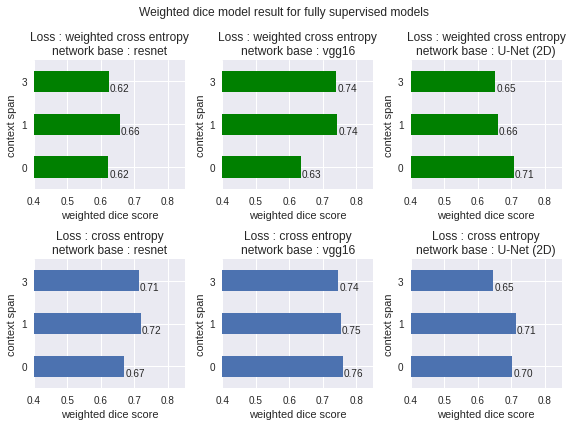

In [77]:
plt.figure(figsize=(8,6))

for i, n in enumerate(zip(['fcn8_resnet', 'fcn8_vgg16', 'unet2d'], ['resnet', 'vgg16', 'U-Net (2D)'])):
    netw, netw_name = n
    ax = plt.subplot(2,3,i+1)
    s = test_wd.loc[:, ('weighted_cross_entropy', netw)]
    bars = s.plot.barh(ax = plt.gca(), legend=False, color = 'g')
    for p in bars.patches:
        ax.annotate(f'{p.get_width():0.2f}', ( p.get_width() * 1.005, p.get_y() + 0.03))
    plt.xlabel('weighted dice score')
    plt.ylabel('context span')
    plt.xlim(0.4,0.85)
    plt.title(f'Loss : weighted cross entropy\nnetwork base : {netw_name}')

for i, n in enumerate(zip(['fcn8_resnet', 'fcn8_vgg16', 'unet2d'], ['resnet', 'vgg16', 'U-Net (2D)'])):
    netw, netw_name = n
    ax = plt.subplot(2,3,i+4)
    s = test_wd.loc[:, ('cross_entropy', netw)]
    bars = s.plot.barh(ax = plt.gca(), legend=False)
    for p in bars.patches:
        ax.annotate(f'{p.get_width():0.2f}', ( p.get_width() * 1.005, p.get_y() + 0.03))
    plt.xlabel('weighted dice score')
    plt.ylabel('context span')
    plt.xlim(0.4,0.85)
    plt.title(f'Loss : cross entropy\nnetwork base : {netw_name}')

plt.suptitle('Weighted dice model result for fully supervised models')
plt.tight_layout()

plt.savefig('FullySupervised.pdf')


In [78]:
foldername = results_dict[2].query("context_span == 0 & loss == 'weighted_cross_entropy' & model_base == 'fcn8_vgg16'").foldername.iloc[2]
print(foldername)


a45a47e056a21b7bb02fa52bf8cfe64d


a45a47e056a21b7bb02fa52bf8cfe64d


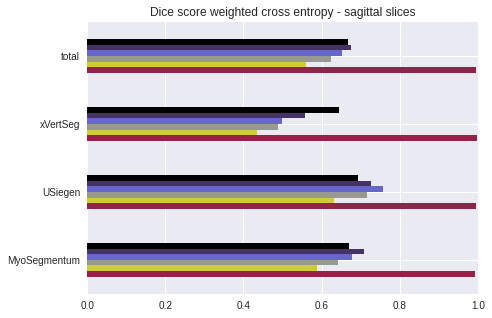

In [79]:
foldername = results_dict[2].query("context_span == 0 & loss == 'weighted_cross_entropy' & model_base == 'fcn8_vgg16'").foldername.iloc[2]
print(foldername)
Myo_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_MyoSegmenTUM_df.csv'), index_col=0)
USieg_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_USiegen_df.csv'), index_col=0)
xVert_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_xVertSeg_df.csv'), index_col=0)
all_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_df.csv'), index_col=0)

temp = pd.DataFrame()
for name, df in zip(['MyoSegmentum', 'USiegen', 'xVertSeg', 'total'], [Myo_df, USieg_df, xVert_df, all_df]):
    temp[name] = df['dice']

temp.T.plot(kind = 'barh', xlim = (0, 1), figsize=(7, 5), color=colors, legend=False)
plt.title('Dice score weighted cross entropy - sagittal slices')
#plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15),ncol=6)
plt.savefig('full_perClass_perSource_weighted.pdf',bbox_inches='tight')

edc036f241e350ed66b07d6edebaaef2


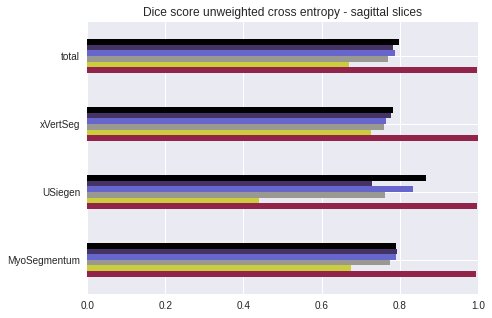

In [80]:
foldername = results_dict[2].query("context_span == 0 & loss == 'cross_entropy' & model_base == 'fcn8_vgg16'").foldername.iloc[0]
print(foldername)
Myo_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_MyoSegmenTUM_df.csv'), index_col=0)
USieg_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_USiegen_df.csv'), index_col=0)
xVert_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_xVertSeg_df.csv'), index_col=0)
all_df = pd.read_csv(os.path.join(base_path[2], foldername, 'test_metrics_df.csv'), index_col=0)

temp = pd.DataFrame()
for name, df in zip(['MyoSegmentum', 'USiegen', 'xVertSeg', 'total'], [Myo_df, USieg_df, xVert_df, all_df]):
    temp[name] = df['dice']

temp.T.plot(kind = 'barh', xlim = (0, 1), figsize=(7, 5),color=colors, legend=False)
plt.title('Dice score unweighted cross entropy - sagittal slices')
#plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15),ncol=6)
plt.savefig('full_perClass_perSource_notweighted.pdf',bbox_inches='tight')
all_df.to_csv('full_per_class_unweighted')

   denoise  erode  weighted_dice_score  precision    recall
0        0      0               0.0005   0.166667  0.164586
1        0      1               0.0005   0.166667  0.164586
2        0      2               0.0005   0.166667  0.164586
3        0      3               0.0005   0.166667  0.164586
4        1      0               0.0005   0.166667  0.164586


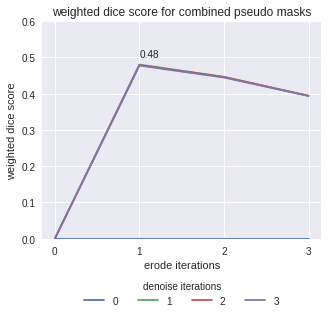

In [81]:
filename = '/media/jan/DataStorage/ProjectData/temp/reconstruct_from_precalc/validationSet_morphologicalIterations.csv'

optimization = pd.read_csv(filename)
print(optimization.head())
optimization = optimization.pivot(index=['erode'], columns=['denoise'], values='weighted_dice_score')
optimization.plot(figsize = (5,4))
plt.title('weighted dice score for combined pseudo masks')
plt.ylabel('weighted dice score')

plt.ylim(0,0.6)
plt.annotate(f'{optimization.max().max():0.2f}', ( 1, 0.5))
plt.xlabel('erode iterations')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.35),ncol=6, title='denoise iterations')
#plt.tight_layout()
plt.savefig('combination_optimization_precalc.pdf', bbox_inches='tight')
plt.xticks([0,1,2,3])
plt.show()

In [82]:
base_path_raw = r'/media/jan/DataStorage/ProjectData/temp/results_precalc_dataset_X_contrast_3'
base_path = [os.path.abspath(base_path_raw.replace('X', str(i))) for i in range(3)]

results_dict = {dim : get_results_frame(dim) for dim in range(3)}
print(results_dict[0][['test_weighted_dice', 'val_weighted_dice', 'foldername']])
print(results_dict[1][['test_weighted_dice', 'val_weighted_dice', 'foldername']])
print(results_dict[2][['test_weighted_dice', 'val_weighted_dice', 'foldername']])

No experimant dict for folder /media/jan/DataStorage/ProjectData/temp/results_precalc_dataset_0_contrast_3/e5df8bf39051f574de84779e9b30c029.
No experimant dict for folder /media/jan/DataStorage/ProjectData/temp/results_precalc_dataset_2_contrast_3/c7b02010de6c331ef2d9a22ebdbf0e33_xVertSeg.
No experimant dict for folder /media/jan/DataStorage/ProjectData/temp/results_precalc_dataset_2_contrast_3/2c240a2d9895940418ee1820be26fcfe_MyoSegmenTUM.
No experimant dict for folder /media/jan/DataStorage/ProjectData/temp/results_precalc_dataset_2_contrast_3/c7b02010de6c331ef2d9a22ebdbf0e33_USiegen.
No experimant dict for folder /media/jan/DataStorage/ProjectData/temp/results_precalc_dataset_2_contrast_3/2c240a2d9895940418ee1820be26fcfe_USiegen.
No experimant dict for folder /media/jan/DataStorage/ProjectData/temp/results_precalc_dataset_2_contrast_3/c7b02010de6c331ef2d9a22ebdbf0e33_MyoSegmenTUM.
No experimant dict for folder /media/jan/DataStorage/ProjectData/temp/results_precalc_dataset_2_contras

In [83]:
base_path = [r'/media/jan/DataStorage/ProjectData/temp/results_pseudo']
results = get_results_frame(0)

results[['context_span', 'blob_points', 'bg_points', 'loss', 'separation_loss', 'weighted_point_loss', 'prior_extend', 'sources', 'test_weighted_dice', 'foldername']]

,context_span,blob_points,bg_points,loss,separation_loss,weighted_point_loss,prior_extend,sources,test_weighted_dice,foldername
0,3,1,-1,cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.548063,b1292d31b739d2327982349d5f6b27e8
1,1,1,-1,cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.545383,dfaeaf1bd9747b2b0d135fd495f699ec
2,0,1,-1,cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.540649,edc036f241e350ed66b07d6edebaaef2
3,3,1,-1,weighted_cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.475467,26aa087080bfa4fb5a6602d6fda8757d
4,0,1,-1,weighted_cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.468015,ab60e3fb01ac94277d5b75f445473d42
5,1,1,-1,weighted_cross_entropy,False,False,False,"[xVertSeg, USiegen, MyoSegmenTUM]",0.451435,365ae50c5f1f0a7320a2db9e99cd5cc8


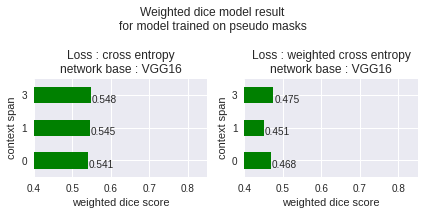

In [84]:
plt.figure(figsize=(6,3))

ax = plt.subplot(1,2,1)
s = results[results.loss == 'cross_entropy'].sort_values('context_span')
bars = s.plot.barh(ax = plt.gca(), legend=False, color = 'g', x='context_span', y='test_weighted_dice')
for p in bars.patches:
    ax.annotate(f'{p.get_width():0.3f}', ( p.get_width() * 1.005, p.get_y() + 0.03))
plt.xlabel('weighted dice score')
plt.ylabel('context span')
plt.xlim(0.4,0.85)
plt.title(f'Loss : cross entropy\nnetwork base : VGG16')

ax = plt.subplot(1,2,2)
s = results[results.loss == 'weighted_cross_entropy'].sort_values('context_span')
bars = s.plot.barh(ax = plt.gca(), legend=False, color = 'g', x='context_span', y='test_weighted_dice')
for p in bars.patches:
    ax.annotate(f'{p.get_width():0.3f}', ( p.get_width() * 1.005, p.get_y() + 0.03))
plt.xlabel('weighted dice score')
plt.ylabel('context span')
plt.xlim(0.4,0.85)
plt.title(f'Loss : weighted cross entropy\nnetwork base : VGG16')

plt.suptitle('Weighted dice model result\nfor model trained on pseudo masks')

plt.tight_layout()

plt.savefig('PseudoSupervised.pdf')

edc036f241e350ed66b07d6edebaaef2


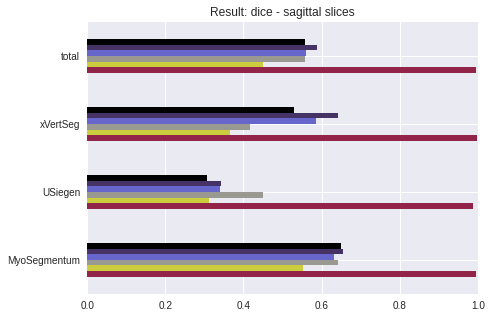

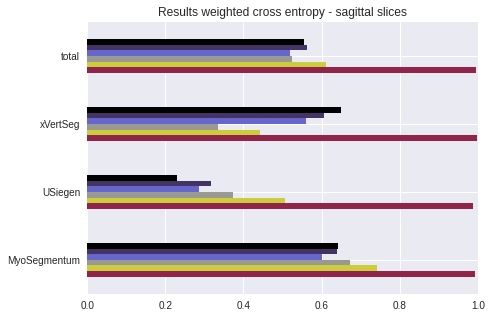

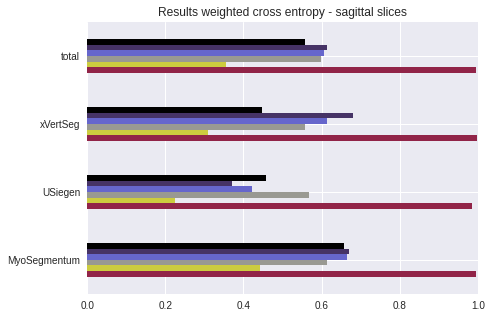

In [85]:
foldername = r'edc036f241e350ed66b07d6edebaaef2'
print(foldername)
Myo_df = pd.read_csv(os.path.join(base_path[0], foldername, 'test_metrics_MyoSegmenTUM_df.csv'), index_col=0)
USieg_df = pd.read_csv(os.path.join(base_path[0], foldername, 'test_metrics_USiegen_df.csv'), index_col=0)
xVert_df = pd.read_csv(os.path.join(base_path[0], foldername, 'test_metrics_xVertSeg_df.csv'), index_col=0)
all_df = pd.read_csv(os.path.join(base_path[0], foldername, 'test_metrics_df.csv'), index_col=0)

temp = pd.DataFrame()
for name, df in zip(['MyoSegmentum', 'USiegen', 'xVertSeg', 'total'], [Myo_df, USieg_df, xVert_df, all_df]):
    temp[name] = df['dice']

temp.T.plot(kind = 'barh', xlim = (0, 1), figsize=(7, 5),color=colors, legend=False)
plt.title('Result: dice - sagittal slices')
#plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15),ncol=6)
plt.savefig('pseudo_perClass_perSource_dice.pdf',bbox_inches='tight')

temp = pd.DataFrame()
for name, df in zip(['MyoSegmentum', 'USiegen', 'xVertSeg', 'total'], [Myo_df, USieg_df, xVert_df, all_df]):
    temp[name] = df['precision']

temp.T.plot(kind = 'barh', xlim = (0, 1), figsize=(7, 5),color=colors, legend=False)
plt.title('Results weighted cross entropy - sagittal slices')
#plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15),ncol=6)
plt.savefig('pseudo_perClass_perSource_precision.pdf',bbox_inches='tight')

temp = pd.DataFrame()
for name, df in zip(['MyoSegmentum', 'USiegen', 'xVertSeg', 'total'], [Myo_df, USieg_df, xVert_df, all_df]):
    temp[name] = df['recall']

temp.T.plot(kind = 'barh', xlim = (0, 1), figsize=(7, 5),color=colors, legend=False)
plt.title('Results weighted cross entropy - sagittal slices')
#plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15),ncol=6)
plt.savefig('pseudo_perClass_perSource_recall.pdf',bbox_inches='tight')